In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import image
from nilearn import signal
from nilearn.maskers import NiftiMasker
from nilearn.maskers import NiftiMapsMasker
from nilearn.plotting import plot_roi, plot_stat_map,plot_epi, plot_img
from nilearn import datasets, surface, plotting
from nilearn.image import new_img_like
import nilearn as nl 
import nibabel as nib
from nilearn import datasets
import os
import glob
from nltools import Brain_Data
import seaborn as sns
from scipy.stats import pearsonr 
from flexitext import flexitext


# Homemade functions

In [2]:
def fit_mask_get_mean(current_mask, sub_data):
    try:
        fit_2_mask = current_mask.fit_transform(sub_data)
        mean_score = np.mean(fit_2_mask)
    except ValueError:
        mean_score = 0
    return mean_score

In [87]:
# Function for plotting brain maps. 

fsaverage = datasets.fetch_surf_fsaverage()

def plot_brainmaps_results(COC_AVG_file, COC_STD_file, PLA_AVG_file, PLA_STD_file, titles):

    texture_pial_right_COC_AVG = surface.vol_to_surf(COC_AVG_file.slicer[:, :, :, 0], fsaverage.pial_right, n_samples=10, interpolation="nearest")
    texture_pial_left_COC_AVG = surface.vol_to_surf(COC_AVG_file.slicer[:, :, :, 0], fsaverage.pial_left, n_samples=10, interpolation="nearest")

    texture_pial_right_PLA_AVG = surface.vol_to_surf(PLA_AVG_file.slicer[:, :, :, 0], fsaverage.pial_right, n_samples=10, interpolation="nearest")
    texture_pial_left_PLA_AVG = surface.vol_to_surf(PLA_AVG_file.slicer[:, :, :, 0], fsaverage.pial_left, n_samples=10, interpolation="nearest")

    texture_pial_right_COC_STD = surface.vol_to_surf(COC_STD_file.slicer[:, :, :, 0], fsaverage.pial_right, n_samples=10, interpolation="nearest")
    texture_pial_left_COC_STD = surface.vol_to_surf(COC_STD_file.slicer[:, :, :, 0], fsaverage.pial_left, n_samples=10, interpolation="nearest")

    texture_pial_right_PLA_STD = surface.vol_to_surf(PLA_STD_file.slicer[:, :, :, 0], fsaverage.pial_right, n_samples=10, interpolation="nearest")
    texture_pial_left_PLA_STD = surface.vol_to_surf(PLA_STD_file.slicer[:, :, :, 0], fsaverage.pial_left, n_samples=10, interpolation="nearest")

    fig, axs = plt.subplots(4, 2, figsize=(10, 16), sharex=True, sharey=True, subplot_kw={"projection": "3d"}) 

    # Plot COC AVG brain maps on first row.
    axs[0, 0].xaxis.set_tick_params(labelbottom=False, bottom=False)
    axs[0, 0].yaxis.set_tick_params(labelleft=False, left=False)
    axs[0, 1].xaxis.set_tick_params(labelbottom=False, bottom=False)
    axs[0, 1].yaxis.set_tick_params(labelleft=False, left=False)
    fig.text(x=0.40, y=0.85, s=titles[0], fontdict={"fontsize": 20})
    plotting.plot_surf(fsaverage.pial_left, texture_pial_left_COC_AVG, colorbar=True, cmap='viridis', axes=axs[0, 0]) 
    plotting.plot_surf(fsaverage.pial_right, texture_pial_right_COC_AVG, colorbar=True, cmap='viridis', axes=axs[0, 1]) 

    # Plot PLA AVG brain maps on second row.
    axs[1, 0].xaxis.set_tick_params(labelbottom=False, bottom=False)
    axs[1, 0].yaxis.set_tick_params(labelleft=False, left=False)
    axs[1, 1].xaxis.set_tick_params(labelbottom=False, bottom=False)
    axs[1, 1].yaxis.set_tick_params(labelleft=False, left=False)
    fig.text(x=0.40, y=0.65, s=titles[1], fontdict={"fontsize": 20})
    plotting.plot_surf(fsaverage.pial_left, texture_pial_left_PLA_AVG, colorbar=True, cmap='viridis', axes=axs[1, 0]) 
    plotting.plot_surf(fsaverage.pial_right, texture_pial_right_PLA_AVG, colorbar=True, cmap='viridis', axes=axs[1, 1]) 

    # Plot COC STD brain maps on third row.
    axs[2, 0].xaxis.set_tick_params(labelbottom=False, bottom=False)
    axs[2, 0].yaxis.set_tick_params(labelleft=False, left=False)
    axs[2, 1].xaxis.set_tick_params(labelbottom=False, bottom=False)
    axs[2, 1].yaxis.set_tick_params(labelleft=False, left=False)
    fig.text(x=0.40, y=0.45, s=titles[2], fontdict={"fontsize": 20})
    plotting.plot_surf(fsaverage.pial_left, texture_pial_left_COC_STD, colorbar=True, cmap='viridis', axes=axs[2, 0]) 
    plotting.plot_surf(fsaverage.pial_right, texture_pial_right_COC_STD, colorbar=True, cmap='viridis', axes=axs[2, 1]) 

    # Plot PLS STD brain maps on fourth row.
    axs[3, 0].xaxis.set_tick_params(labelbottom=False, bottom=False)
    axs[3, 0].yaxis.set_tick_params(labelleft=False, left=False)
    axs[3, 1].xaxis.set_tick_params(labelbottom=False, bottom=False)
    axs[3, 1].yaxis.set_tick_params(labelleft=False, left=False)
    fig.text(x=0.40, y=0.25, s=titles[3], fontdict={"fontsize": 20})
    plotting.plot_surf(fsaverage.pial_left, texture_pial_left_PLA_STD, colorbar=True, cmap='viridis', axes=axs[3, 0]) 
    plotting.plot_surf(fsaverage.pial_right, texture_pial_right_PLA_STD, colorbar=True, cmap='viridis', axes=axs[3, 1]) 

    plt.show()


In [111]:
# Function for plotting brain maps of change score files. 

def plotting_brainmaps_change(Change_file, Change_title):

    texture_pial_right_Change = surface.vol_to_surf(Change_file.slicer[:, :, :, 0], fsaverage.pial_right, n_samples=10, interpolation="nearest")
    texture_pial_left_Change = surface.vol_to_surf(Change_file.slicer[:, :, :, 0], fsaverage.pial_left, n_samples=10, interpolation="nearest")

    fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True, subplot_kw={"projection": "3d"}) 

    # Plot Change brain maps on first row.
    axs[0].xaxis.set_tick_params(labelbottom=False, bottom=False)
    axs[0].yaxis.set_tick_params(labelleft=False, left=False)
    axs[1].xaxis.set_tick_params(labelbottom=False, bottom=False)
    axs[1].yaxis.set_tick_params(labelleft=False, left=False)
    fig.text(x=0.38, y=0.75, s=Change_title, fontdict={"fontsize": 15})
    plotting.plot_surf(fsaverage.pial_left, texture_pial_left_Change, colorbar=True, cmap='viridis', axes=axs[0]) 
    plotting.plot_surf(fsaverage.pial_right, texture_pial_right_Change, colorbar=True, cmap='viridis', axes=axs[1]) 
    
    plt.show()


# Open Hassen Neurotransmitters Maps

In [3]:
# Now open a directory/folder 
fd = os.open("/Users/luisalvarez/Documents", os.O_RDONLY)

# Use os.fchdir() method to change the dir/folder
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents


### Dopamine Maps

In [4]:
# Define paths to Hassen files for dopamine neurotransmitters. 
path_D1 = "GitHub/hansen_receptors/data/PET_nifti_images/D1_SCH23390_hc13_kaller.nii"
path_D2_smith = "GitHub/hansen_receptors/data/PET_nifti_images/D2_flb457_hc37_smith.nii.gz"
path_D2_sandiego = "GitHub/hansen_receptors/data/PET_nifti_images/D2_flb457_hc55_sandiego.nii.gz"
path_DAT = "GitHub/hansen_receptors/data/PET_nifti_images/DAT_fpcit_hc174_dukart_spect.nii"

# Create Brain_data objects for each file. 
D1_map = Brain_Data(path_D1).to_nifti()
D2_smith_map = Brain_Data(path_D2_smith).to_nifti()
D2_sandiego_map = Brain_Data(path_D2_sandiego).to_nifti()
DAT_map = Brain_Data(path_DAT).to_nifti()

# Check the shape of each file.
print("D1_map shape: " + str(D1_map.shape))
print("D2_smith_map shape: " + str(D2_smith_map.shape))
print("D2_sandiego_map shape: " + str(D2_sandiego_map.shape))
print("DAT_map shape: " + str(DAT_map.shape))


D1_map shape: (91, 109, 91)
D2_smith_map shape: (91, 109, 91)
D2_sandiego_map shape: (91, 109, 91)
DAT_map shape: (91, 109, 91)


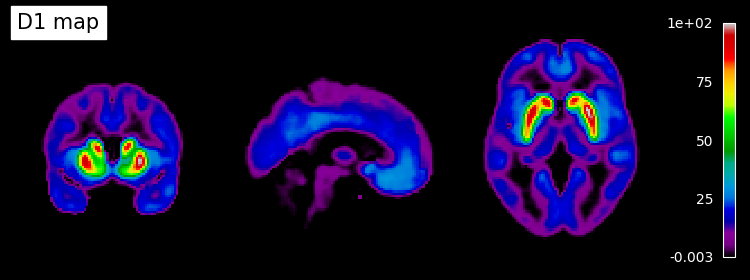

In [5]:
# Visualize the D1 map.
plot_epi(D1_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="D1 map")


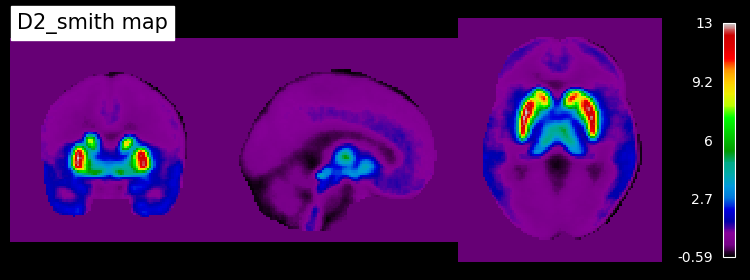

In [6]:
# Visualize the D2_smith map.
plot_epi(D2_smith_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="D2_smith map")


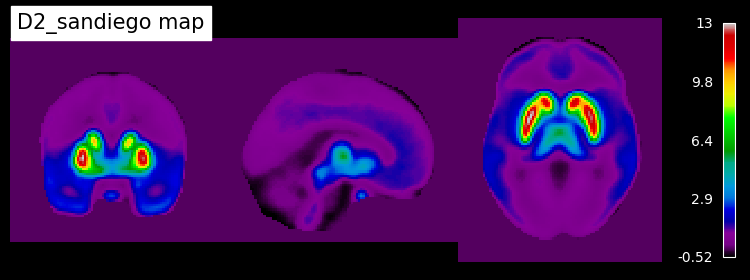

In [7]:
# Visualize the D2_sandiego map.
plot_epi(D2_sandiego_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="D2_sandiego map")


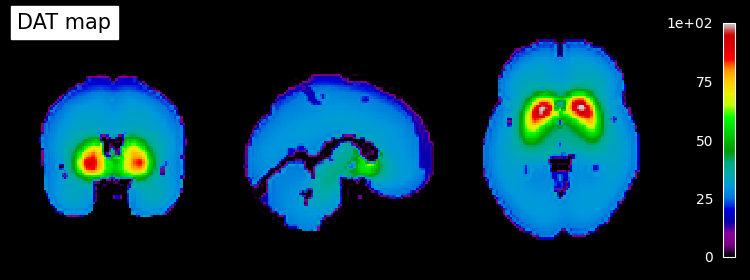

In [8]:
# Visualize the DAT map.
plot_epi(DAT_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="DAT map")

### Norepinephrine Maps

In [9]:
# Define paths to Hassen files for norepinephrine neurotransmitters. 
path_NAT = "GitHub/hansen_receptors/data/PET_nifti_images/NAT_MRB_hc77_ding.nii.gz"

# Create Brain_data objects for each file. 
NAT_map = Brain_Data(path_NAT).to_nifti()

# Check the shape of each file.
print("NAT_map shape: " + str(NAT_map.shape))

NAT_map shape: (91, 109, 91)


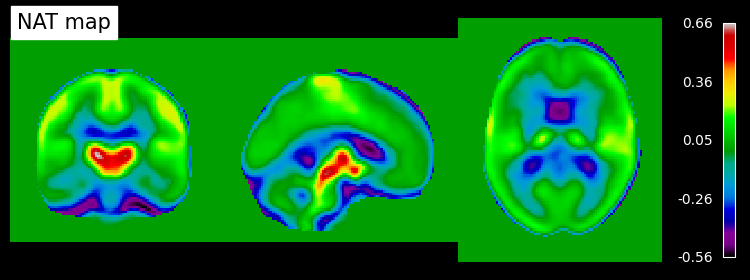

In [10]:
# Visualize the NAT map.
plot_epi(NAT_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="NAT map")

### Glutamate Maps

In [11]:
# Define paths to Hassen files for dopamine neurotransmitters. 
path_mGlu = "GitHub/hansen_receptors/data/PET_nifti_images/mGluR5_abp_hc73_smart.nii"
path_NMDA = "GitHub/hansen_receptors/data/PET_nifti_images/NMDA_ge179_hc29_galovic.nii.gz"

# Create Brain_data objects for each file. 
mGlu_map = Brain_Data(path_mGlu).to_nifti()
NMDA_map = Brain_Data(path_NMDA).to_nifti()

# Check the shape of each file.
print("mGlu_map shape: " + str(mGlu_map.shape))
print("NMDA_map shape: " + str(NMDA_map.shape))


mGlu_map shape: (91, 109, 91)
NMDA_map shape: (91, 109, 91)


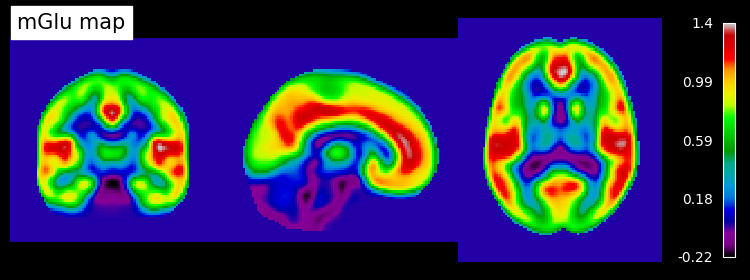

In [12]:
# Visualize the mGlu map.
plot_epi(mGlu_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="mGlu map")

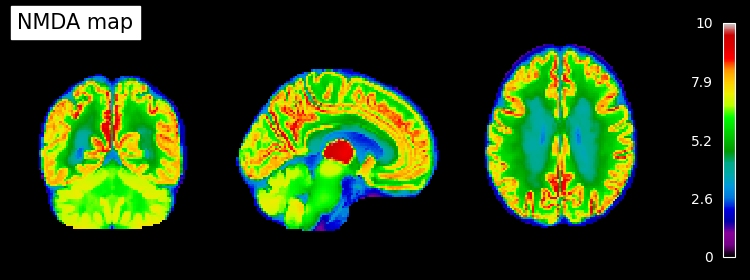

In [13]:
# Visualize the NMDA map.
plot_epi(NMDA_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="NMDA map")

### GABA Maps

In [14]:
# Define paths to Hassen files for GABA neurotransmitters. 
path_GABAa = "GitHub/hansen_receptors/data/PET_nifti_images/GABAa_flumazenil_hc6_dukart.nii"
path_GABAbz = "GitHub/hansen_receptors/data/PET_nifti_images/GABAa-bz_flumazenil_hc16_norgaard.nii"

# Create Brain_data objects for each file. 
GABAa_map = Brain_Data(path_GABAa).to_nifti()
GABAbz_map = Brain_Data(path_GABAbz).to_nifti()

# Check the shape of each file.
print("GABAa shape: " + str(GABAa_map.shape))
print("GABAbz shape: " + str(GABAbz_map.shape))

GABAa shape: (91, 109, 91)
GABAbz shape: (91, 109, 91)


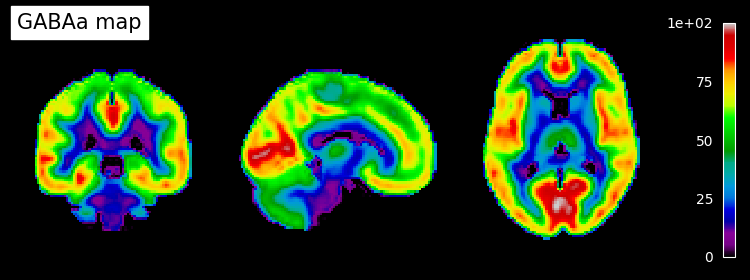

In [15]:
# Visualize the GABAa map.
plot_epi(GABAa_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="GABAa map")

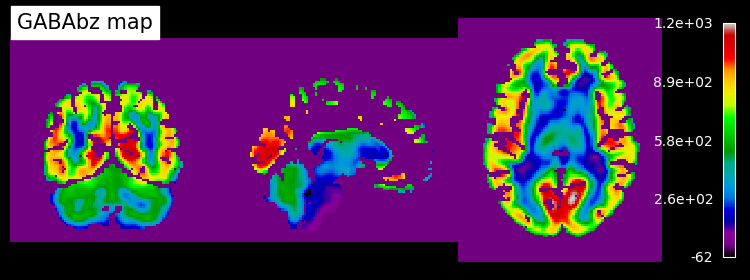

In [16]:
# Visualize the GABAbz map.
plot_epi(GABAbz_map, draw_cross=False, annotate=False, black_bg=True, colorbar=True, title="GABAbz map")

## Display AA Results

In [18]:
# Load the AAL atlas from nilearn.
AA = datasets.fetch_atlas_aal()

# Store atlas info.
AA_maps = AA.maps 

AA_labels = AA.labels

AA_indices = AA.indices

print("AA_labels: " + str(AA_labels))
print("AA_indices: " + str(AA_indices))

AA_labels: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', 'Fusiform_L', 'Fusif

In [19]:
# Get AAL COC-PLA change scores csv file. 
Change_PC1_AA_scores_df = pd.read_csv('/Users/luisalvarez/Documents/GitHub/ResearchElective_Maastricht2023/AAFIT_GM_PC1_ChangeScores.csv', index_col=0) 

# Calculate mean change score for each region.
Change_PC1_AA_mean_scores = []

for x in range(len(AA_labels)):
    Change_PC1_AA_mean_scores.append(Change_PC1_AA_scores_df[AA_labels[x]].mean(skipna=True))

In [ ]:
# Show top 5 ROIs with most positive change score.



In [ ]:
# Show top 5 ROIs with most negative change score.



In [46]:
# Load nii files. 
AAL_COC_AVG_PC_path = "GitHub/ResearchElective_Maastricht2023/AA_AveragePC1Scores_COC.nii.gz"
AAL_COC_STD_PC_path = "GitHub/ResearchElective_Maastricht2023/AA_StdPC1Scores_COC.nii.gz"
AAL_PLA_AVG_PC_path = "GitHub/ResearchElective_Maastricht2023/AA_AveragePC1Scores_PLA.nii.gz"
AAL_PLA_STD_PC_path = "GitHub/ResearchElective_Maastricht2023/AA_StdPC1Scores_PLA.nii.gz"
AAL_PC_Change_path = "GitHub/ResearchElective_Maastricht2023/AA_AveragePC1Scores_Change.nii.gz"

AAL_COC_AVG_PC_file = nib.load(AAL_COC_AVG_PC_path)
AAL_COC_STD_PC_file = nib.load(AAL_COC_STD_PC_path)
AAL_PLA_AVG_PC_file = nib.load(AAL_PLA_AVG_PC_path)
AAL_PLA_STD_PC_file = nib.load(AAL_PLA_STD_PC_path)
AAL_PC_Change_file = nib.load(AAL_PC_Change_path)


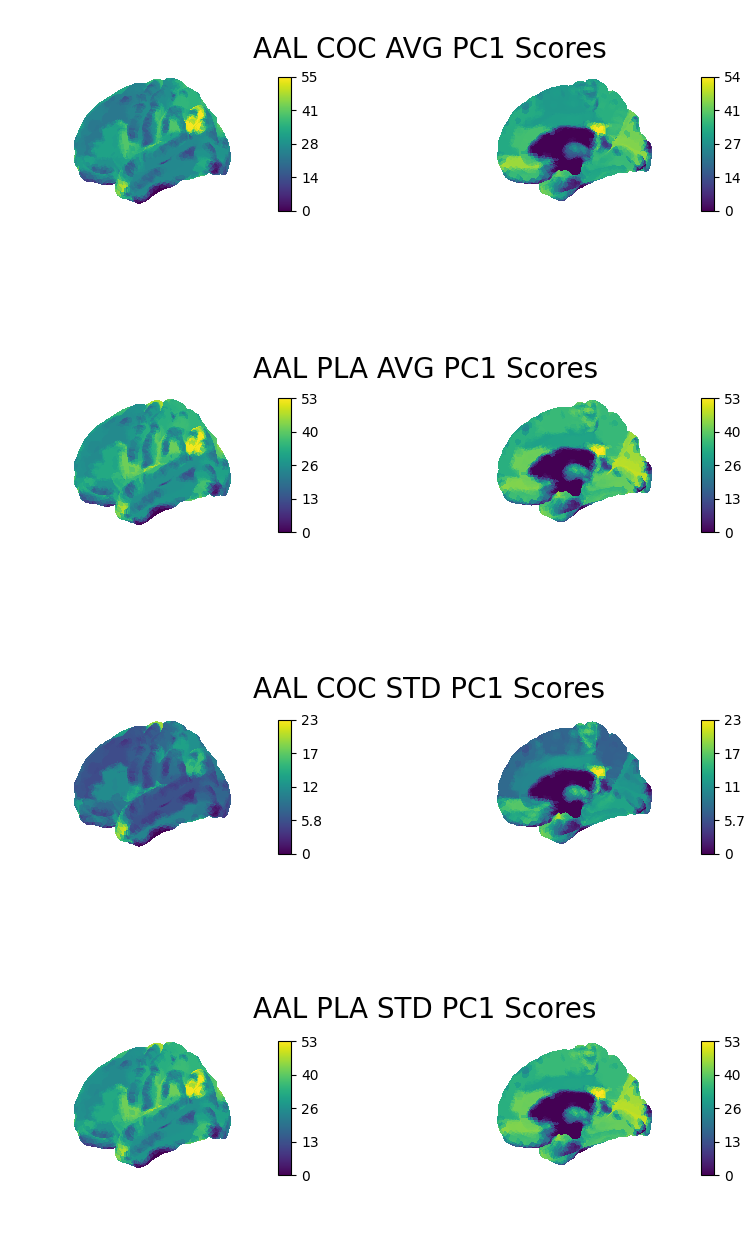

In [88]:
# Show brain maps for COC and PLA (AVG & STD). 

all_titles = ['AAL COC AVG PC1 Scores', 'AAL PLA AVG PC1 Scores', 'AAL COC STD PC1 Scores', 'AAL PLA STD PC1 Scores']

plot_brainmaps_results(AAL_COC_AVG_PC_file, AAL_COC_STD_PC_file, AAL_PLA_AVG_PC_file, AAL_PLA_STD_PC_file, all_titles)


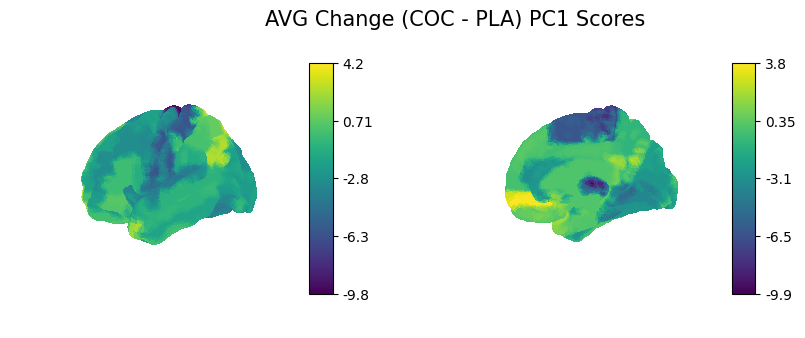

In [112]:
# Show change score brain map (COC - PLA mean change score). 

plotting_brainmaps_change(AAL_PC_Change_file, "AVG Change (COC - PLA) PC1 Scores")

## Compare Neurotransmitter Densities to AA map 

In [27]:
# Compute a mask for each parcel in the AAL atlas. 
aal_roi_masks = []

for x in range(116):
    
    print("Computing and plotting roi_" +str(x) +": " + str(AA_labels[x]))
    roi_img =nl.image.new_img_like(AA_maps, nl.image.get_data(AA_maps) == int(AA_indices[x]))
    masker = NiftiMasker(mask_img=roi_img, mask_strategy="gm-template", verbose=False).fit()
    aal_roi_masks.append(masker)
    

Computing and plotting roi_0: Precentral_L
Computing and plotting roi_1: Precentral_R
Computing and plotting roi_2: Frontal_Sup_L
Computing and plotting roi_3: Frontal_Sup_R
Computing and plotting roi_4: Frontal_Sup_Orb_L
Computing and plotting roi_5: Frontal_Sup_Orb_R
Computing and plotting roi_6: Frontal_Mid_L
Computing and plotting roi_7: Frontal_Mid_R
Computing and plotting roi_8: Frontal_Mid_Orb_L
Computing and plotting roi_9: Frontal_Mid_Orb_R
Computing and plotting roi_10: Frontal_Inf_Oper_L
Computing and plotting roi_11: Frontal_Inf_Oper_R
Computing and plotting roi_12: Frontal_Inf_Tri_L
Computing and plotting roi_13: Frontal_Inf_Tri_R
Computing and plotting roi_14: Frontal_Inf_Orb_L
Computing and plotting roi_15: Frontal_Inf_Orb_R
Computing and plotting roi_16: Rolandic_Oper_L
Computing and plotting roi_17: Rolandic_Oper_R
Computing and plotting roi_18: Supp_Motor_Area_L
Computing and plotting roi_19: Supp_Motor_Area_R
Computing and plotting roi_20: Olfactory_L
Computing and p

In [28]:
# Fit AAL to Hassen Neurotransmitters maps. 

D1_to_AAL_mean_scores = []
D2_smith_to_AAL_mean_scores = []
D2_sd_to_AAL_mean_scores = []
DAT_to_AAL_mean_scores = []
NAT_to_AAL_mean_scores = []
mGlu_to_AAL_mean_scores = []
NMDA_to_AAL_mean_scores = []
GABAa_to_AAL_mean_scores = []
GABAbz_to_AAL_mean_scores = []

for current_roi in range(116):

    D1_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], D1_map))
    D2_smith_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], D2_smith_map))
    D2_sd_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], D2_sandiego_map))
    DAT_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], DAT_map))
    NAT_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], NAT_map))
    mGlu_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], mGlu_map))
    NMDA_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], NMDA_map))
    GABAa_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], GABAa_map))
    GABAbz_to_AAL_mean_scores.append(fit_mask_get_mean(aal_roi_masks[current_roi], GABAbz_map))
    




In [29]:
# Compute correlation between Hassen maps and AAL PC1 scores 
D1_AAl_cor = pearsonr(Change_PC1_AA_mean_scores, D1_to_AAL_mean_scores)
D2_smith_AAl_cor = pearsonr(Change_PC1_AA_mean_scores, D2_smith_to_AAL_mean_scores)
D2_sd_AAl_cor = pearsonr(Change_PC1_AA_mean_scores, D2_sd_to_AAL_mean_scores)
DAT_AAl_cor = pearsonr(Change_PC1_AA_mean_scores, DAT_to_AAL_mean_scores)

NAT_AAl_cor = pearsonr(Change_PC1_AA_mean_scores, NAT_to_AAL_mean_scores)
mGlu_AAl_cor = pearsonr(Change_PC1_AA_mean_scores, mGlu_to_AAL_mean_scores)
NMDA_AAl_cor = pearsonr(Change_PC1_AA_mean_scores, NMDA_to_AAL_mean_scores)
GABAa_AAl_cor = pearsonr(Change_PC1_AA_mean_scores, GABAa_to_AAL_mean_scores)
GABAbz_AAl_cor = pearsonr(Change_PC1_AA_mean_scores, GABAbz_to_AAL_mean_scores)

print("Correlation between D1 map and AAL PC1 scores: r=%3f, p-value=%3f" % (D1_AAl_cor[0], D1_AAl_cor[1])) 
print("Correlation between D2_smith map and AAL PC1 scores: r=%3f, p-value=%3f" % (D2_smith_AAl_cor[0], D2_smith_AAl_cor[1])) 
print("Correlation between D2_sd and AAL PC1 scores: r=%3f, p-value=%3f" % (D2_sd_AAl_cor[0], D2_sd_AAl_cor[1])) 
print("Correlation between DAT map and AAL PC1 scores: r=%3f, p-value=%3f" % (DAT_AAl_cor[0], DAT_AAl_cor[1])) 

print("Correlation between NAT map and AAL PC1 scores: r=%3f, p-value=%3f" % (NAT_AAl_cor[0], NAT_AAl_cor[1])) 
print("Correlation between mGlu map and AAL PC1 scores: r=%3f, p-value=%3f" % (mGlu_AAl_cor[0], mGlu_AAl_cor[1])) 
print("Correlation between NMDA map and AAL PC1 scores: r=%3f, p-value=%3f" % (NMDA_AAl_cor[0], NMDA_AAl_cor[1])) 
print("Correlation between GABAa map and AAL PC1 scores: r=%3f, p-value=%3f" % (GABAa_AAl_cor[0], GABAa_AAl_cor[1])) 
print("Correlation between GABAbz map and AAL PC1 scores: r=%3f, p-value=%3f" % (GABAbz_AAl_cor[0], GABAbz_AAl_cor[1]))

Correlation between D1 map and AAL PC1 scores: r=0.046671, p-value=0.618844
Correlation between D2_smith map and AAL PC1 scores: r=-0.128093, p-value=0.170588
Correlation between D2_sd and AAL PC1 scores: r=-0.151191, p-value=0.105218
Correlation between DAT map and AAL PC1 scores: r=-0.139470, p-value=0.135390
Correlation between NAT map and AAL PC1 scores: r=-0.263604, p-value=0.004248
Correlation between mGlu map and AAL PC1 scores: r=0.323151, p-value=0.000403
Correlation between NMDA map and AAL PC1 scores: r=-0.185226, p-value=0.046525
Correlation between GABAa map and AAL PC1 scores: r=0.336433, p-value=0.000222
Correlation between GABAbz map and AAL PC1 scores: r=0.174240, p-value=0.061395


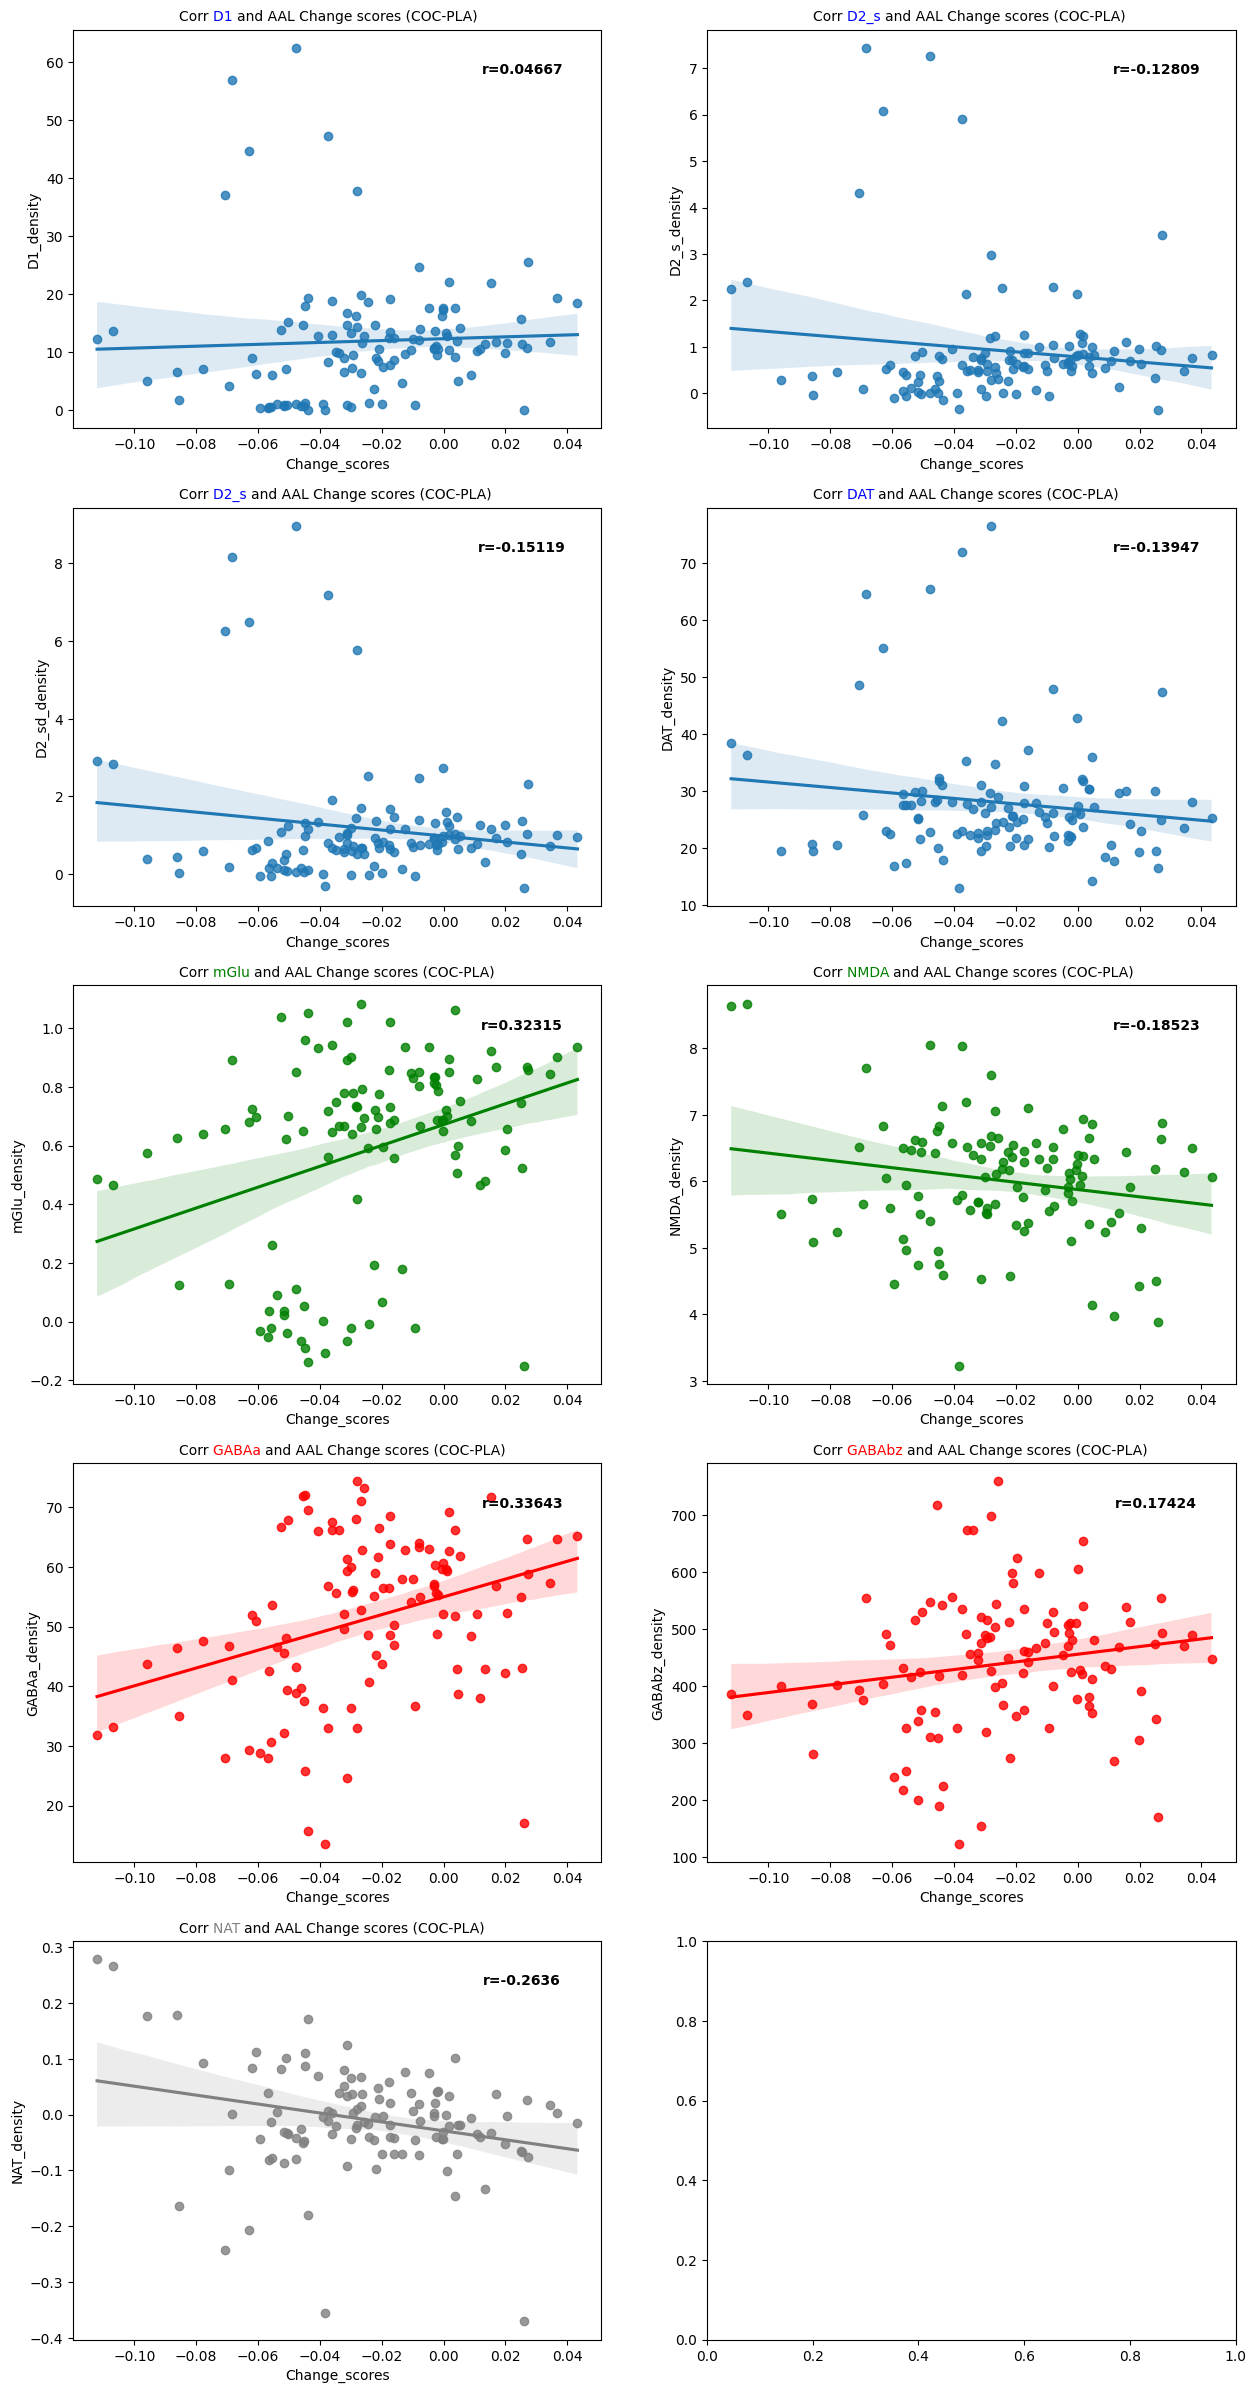

In [30]:

import matplotlib as mpl

mpl.rcParams['figure.facecolor'] = 'w'


all_data_AAL = np.array([Change_PC1_AA_mean_scores, D1_to_AAL_mean_scores, D2_smith_to_AAL_mean_scores, D2_sd_to_AAL_mean_scores, DAT_to_AAL_mean_scores,
                        NAT_to_AAL_mean_scores, mGlu_to_AAL_mean_scores, NMDA_to_AAL_mean_scores, GABAa_to_AAL_mean_scores, GABAbz_to_AAL_mean_scores])

Neurotransmitters_AAl_scores = pd.DataFrame(data=all_data_AAL.T, columns=["Change_scores", "D1_density", "D2_s_density", "D2_sd_density", "DAT_density", "NAT_density", 
                                                                          "mGlu_density", "NMDA_density", "GABAa_density", "GABAbz_density"])

fig, ax = plt.subplots(5, 2, figsize=(15, 30))

regplot_D1 = sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="D1_density", ax=ax[0, 0])
title1 = "Corr <color:blue>D1 </>and AAL Change scores (COC-PLA)"
flexitext(0.2, 1.05, title1, va="top", ax=ax[0, 0])
r_value1 = "<weight:bold, size:10>r="+str(round(D1_AAl_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value1, ha="center", ax=ax[0, 0])

regplot_D2_s = sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="D2_s_density", ax=ax[0, 1])
title2 = "Corr <color:blue>D2_s </>and AAL Change scores (COC-PLA)"
flexitext(0.2, 1.05, title2, va="top", ax=ax[0, 1])
r_value2 = "<weight:bold, size:10>r="+str(round(D2_smith_AAl_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value2, ha="center", ax=ax[0, 1])

regplot_D2_sd = sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="D2_sd_density", ax=ax[1, 0])
title3 = "Corr <color:blue>D2_s </>and AAL Change scores (COC-PLA)"
flexitext(0.2, 1.05, title3, va="top", ax=ax[1, 0])
r_value3 = "<weight:bold, size:10>r="+str(round(D2_sd_AAl_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value3, ha="center", ax=ax[1, 0])

regplot_DAT = sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="DAT_density", ax=ax[1, 1])
title4 = "Corr <color:blue>DAT </>and AAL Change scores (COC-PLA)"
flexitext(0.2, 1.05, title4, va="top", ax=ax[1, 1])
r_value4 = "<weight:bold, size:10>r="+str(round(DAT_AAl_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value4, ha="center", ax=ax[1, 1])

regplot_mGlu = sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="mGlu_density", ax=ax[2, 0], color="green")
title5 = "Corr <color:green>mGlu </>and AAL Change scores (COC-PLA)"
flexitext(0.2, 1.05, title5, va="top", ax=ax[2, 0])
r_value5 = "<weight:bold, size:10>r="+str(round(mGlu_AAl_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value5, ha="center", ax=ax[2, 0])

regplot_NMDA = sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="NMDA_density", ax=ax[2, 1], color="green")
title6 = "Corr <color:green>NMDA </>and AAL Change scores (COC-PLA)"
flexitext(0.2, 1.05, title6, va="top", ax=ax[2, 1])
r_value6 = "<weight:bold, size:10>r="+str(round(NMDA_AAl_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value6, ha="center", ax=ax[2, 1])

regplot_mGlu = sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="GABAa_density", ax=ax[3, 0], color="red") 
title7 = "Corr <color:red>GABAa </>and AAL Change scores (COC-PLA)"
flexitext(0.2, 1.05, title7, va="top", ax=ax[3, 0])
r_value7 = "<weight:bold, size:10>r="+str(round(GABAa_AAl_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value7, ha="center", ax=ax[3, 0])

regplot_NMDA = sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="GABAbz_density", ax=ax[3, 1], color="red")
title8 = "Corr <color:red>GABAbz </>and AAL Change scores (COC-PLA)"
flexitext(0.2, 1.05, title8, va="top", ax=ax[3, 1])
r_value8 = "<weight:bold, size:10>r="+str(round(GABAbz_AAl_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value8, ha="center", ax=ax[3, 1])

regplot_NAT = sns.regplot(data=Neurotransmitters_AAl_scores, x="Change_scores", y="NAT_density", ax=ax[4, 0], color="gray")
title9 = "Corr <color:gray>NAT </>and AAL Change scores (COC-PLA)"
flexitext(0.2, 1.05, title9, va="top", ax=ax[4, 0])
r_value9 = "<weight:bold, size:10>r="+str(round(NAT_AAl_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value9, ha="center", ax=ax[4, 0])

plt.show()


## Display Yeo Atlas (17 Networks) Results

## Compare Neurotransmitter Densities to Yeo Atlas (17 Networks) 

## Display RM Results

In [24]:
rm_data_path = "/Users/luisalvarez/Documents/GitHub/ResearchElective_Maastricht2023/GlebRM_rrm+thal-bg_1mm_20111013_uint8_dilated2-res.nii"
rm_info_path = "/Users/luisalvarez/Documents/GitHub/ResearchElective_Maastricht2023/RM_mni_description_20110513_PS.xlsx"

rm_maps = Brain_Data(rm_data_path).to_nifti()

In [25]:
# Read info from exel file. 
rm_info = pd.read_excel(rm_info_path, index_col=None) 

rm_labels = rm_info["areaCaret"]
rm_idx = rm_info["niftiValue"]

print("Number of lables in rm atlas: " + str(len(rm_labels)))
print("Number of idx in rm atlas: " + str(len(rm_idx)))

Number of lables in rm atlas: 96
Number of idx in rm atlas: 96


In [41]:
# Get AAL COC-PLA change scores csv file. 
Change_PC1_RM_scores_df = pd.read_csv('/Users/luisalvarez/Documents/GitHub/ResearchElective_Maastricht2023/RMFIT_GM_PC1_ChangeScores.csv', index_col=0) 

# Calculate mean change score for each region.
Change_PC1_RM_mean_scores = []

for x in range(len(rm_labels)):
    Change_PC1_RM_mean_scores.append(Change_PC1_AA_scores_df.iloc[:, x].mean(skipna=True))

'TCpol'

## Compare Neurotransmitter Densities to RM Atlas 

In [26]:
RM_roi_masks = []

for x in range(len(rm_labels)):

    try:
        print("Computing and plotting roi_" +str(x) +": " + str(rm_labels[x]))
        roi_img = nl.image.new_img_like(rm_maps, nl.image.get_data(rm_maps) == rm_idx[x])
        masker = NiftiMasker(mask_img=roi_img, mask_strategy="gm-template", verbose=False).fit() 
        RM_roi_masks.append(masker)

    except FileNotFoundError:
        print("Problem with roi_" +str(x) + " " + str(rm_labels[x]))

Computing and plotting roi_0: TCpol
Computing and plotting roi_1: TCs
Computing and plotting roi_2: Amyg
Computing and plotting roi_3: OFCi
Computing and plotting roi_4: INSa
Computing and plotting roi_5: OFCm
Computing and plotting roi_6: TCc
Computing and plotting roi_7: OFCl
Computing and plotting roi_8: TCi
Computing and plotting roi_9: PHC
Computing and plotting roi_10: INS-G
Computing and plotting roi_11: PMCvl
Computing and plotting roi_12: VACv
Computing and plotting roi_13: INSp
Computing and plotting roi_14: PFCpol
Computing and plotting roi_15: HIP
Computing and plotting roi_16: sACC
Computing and plotting roi_17: PFCvl
Computing and plotting roi_18: V2
Computing and plotting roi_19: PFCm
Computing and plotting roi_20: TCv
Computing and plotting roi_21: VACd
Computing and plotting roi_22: V1-right
Computing and plotting roi_23: PFCcl
Computing and plotting roi_24: A2
Computing and plotting roi_25: CCr
Computing and plotting roi_26: CCp
Computing and plotting roi_27: ACC
Comp

In [33]:
# Fit RM to Hassen Neurotransmitters maps. 

D1_to_RM_mean_scores = []
D2_smith_to_RM_mean_scores = []
D2_sd_to_RM_mean_scores = []
DAT_to_RM_mean_scores = []
NAT_to_RM_mean_scores = []
mGlu_to_RM_mean_scores = []
NMDA_to_RM_mean_scores = []
GABAa_to_RM_mean_scores = []
GABAbz_to_RM_mean_scores = []

for current_roi in range(96):

    D1_to_RM_mean_scores.append(fit_mask_get_mean(RM_roi_masks[current_roi], D1_map))
    D2_smith_to_RM_mean_scores.append(fit_mask_get_mean(RM_roi_masks[current_roi], D2_smith_map))
    D2_sd_to_RM_mean_scores.append(fit_mask_get_mean(RM_roi_masks[current_roi], D2_sandiego_map))
    DAT_to_RM_mean_scores.append(fit_mask_get_mean(RM_roi_masks[current_roi], DAT_map))
    NAT_to_RM_mean_scores.append(fit_mask_get_mean(RM_roi_masks[current_roi], NAT_map))
    mGlu_to_RM_mean_scores.append(fit_mask_get_mean(RM_roi_masks[current_roi], mGlu_map))
    NMDA_to_RM_mean_scores.append(fit_mask_get_mean(RM_roi_masks[current_roi], NMDA_map))
    GABAa_to_RM_mean_scores.append(fit_mask_get_mean(RM_roi_masks[current_roi], GABAa_map))
    GABAbz_to_RM_mean_scores.append(fit_mask_get_mean(RM_roi_masks[current_roi], GABAbz_map))
    

In [43]:
# Compute correlation between Hassen maps and AAL PC1 scores 
D1_RM_cor = pearsonr(Change_PC1_RM_mean_scores, D1_to_RM_mean_scores)
D2_smith_RM_cor = pearsonr(Change_PC1_RM_mean_scores, D2_smith_to_RM_mean_scores)
D2_sd_RM_cor = pearsonr(Change_PC1_RM_mean_scores, D2_sd_to_RM_mean_scores)
DAT_RM_cor = pearsonr(Change_PC1_RM_mean_scores, DAT_to_RM_mean_scores)

NAT_RM_cor = pearsonr(Change_PC1_RM_mean_scores, NAT_to_RM_mean_scores)
mGlu_RM_cor = pearsonr(Change_PC1_RM_mean_scores, mGlu_to_RM_mean_scores)
NMDA_RM_cor = pearsonr(Change_PC1_RM_mean_scores, NMDA_to_RM_mean_scores)
GABAa_RM_cor = pearsonr(Change_PC1_RM_mean_scores, GABAa_to_RM_mean_scores)
GABAbz_RM_cor = pearsonr(Change_PC1_RM_mean_scores, GABAbz_to_RM_mean_scores)

print("Correlation between D1 map and RM PC1 scores: r=%3f, p-value=%3f" % (D1_RM_cor[0], D1_RM_cor[1])) 
print("Correlation between D2_smith map and RM PC1 scores: r=%3f, p-value=%3f" % (D2_smith_RM_cor[0], D2_smith_RM_cor[1])) 
print("Correlation between D2_sd and RM PC1 scores: r=%3f, p-value=%3f" % (D2_sd_RM_cor[0], D2_sd_RM_cor[1])) 
print("Correlation between DAT map and RM PC1 scores: r=%3f, p-value=%3f" % (DAT_RM_cor[0], DAT_RM_cor[1])) 

print("Correlation between NAT map and RM PC1 scores: r=%3f, p-value=%3f" % (NAT_RM_cor[0], NAT_RM_cor[1])) 
print("Correlation between mGlu map and RM PC1 scores: r=%3f, p-value=%3f" % (mGlu_RM_cor[0], mGlu_RM_cor[1])) 
print("Correlation between NMDA map and RM PC1 scores: r=%3f, p-value=%3f" % (NMDA_RM_cor[0], NMDA_RM_cor[1])) 
print("Correlation between GABAa map and RM PC1 scores: r=%3f, p-value=%3f" % (GABAa_RM_cor[0], GABAa_RM_cor[1])) 
print("Correlation between GABAbz map and RM PC1 scores: r=%3f, p-value=%3f" % (GABAbz_RM_cor[0], GABAbz_RM_cor[1]))

Correlation between D1 map and RM PC1 scores: r=-0.198653, p-value=0.052345
Correlation between D2_smith map and RM PC1 scores: r=-0.185270, p-value=0.070735
Correlation between D2_sd and RM PC1 scores: r=-0.197586, p-value=0.053650
Correlation between DAT map and RM PC1 scores: r=-0.208535, p-value=0.041457
Correlation between NAT map and RM PC1 scores: r=-0.102927, p-value=0.318320
Correlation between mGlu map and RM PC1 scores: r=0.001657, p-value=0.987216
Correlation between NMDA map and RM PC1 scores: r=-0.122103, p-value=0.235967
Correlation between GABAa map and RM PC1 scores: r=0.039415, p-value=0.702998
Correlation between GABAbz map and RM PC1 scores: r=0.032952, p-value=0.749936


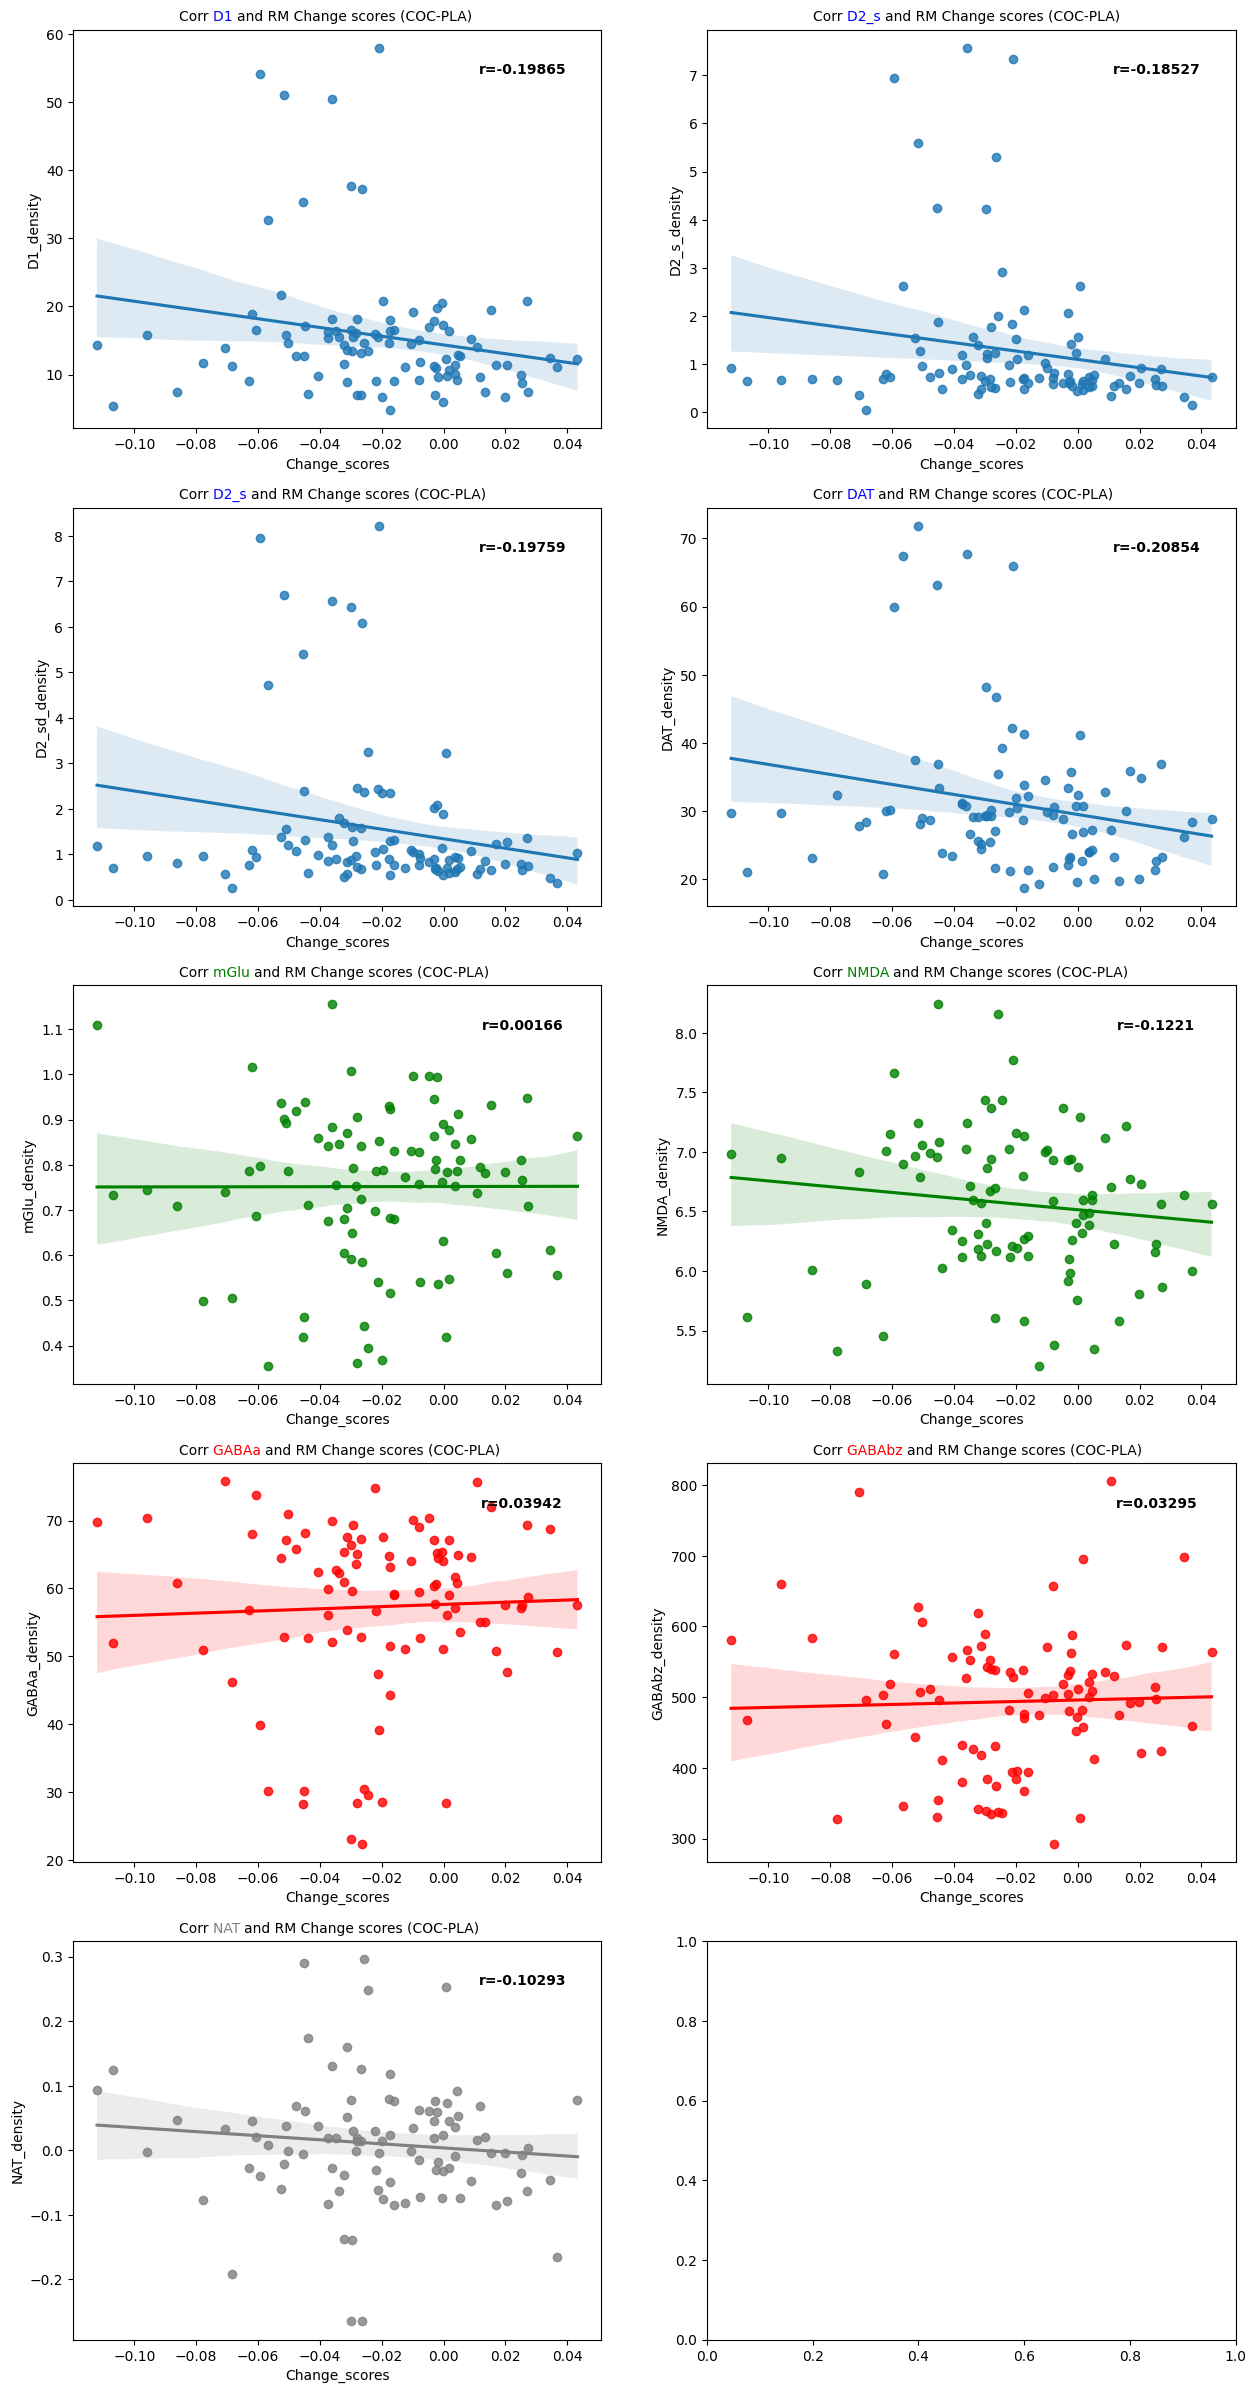

In [45]:
all_data_RM = np.array([Change_PC1_RM_mean_scores, D1_to_RM_mean_scores, D2_smith_to_RM_mean_scores, D2_sd_to_RM_mean_scores, DAT_to_RM_mean_scores,
                        NAT_to_RM_mean_scores, mGlu_to_RM_mean_scores, NMDA_to_RM_mean_scores, GABAa_to_RM_mean_scores, GABAbz_to_RM_mean_scores])

Neurotransmitters_RM_scores = pd.DataFrame(data=all_data_RM.T, columns=["Change_scores", "D1_density", "D2_s_density", "D2_sd_density", "DAT_density", "NAT_density", 
                                                                          "mGlu_density", "NMDA_density", "GABAa_density", "GABAbz_density"])

fig, ax = plt.subplots(5, 2, figsize=(15, 30))

regplot_D1 = sns.regplot(data=Neurotransmitters_RM_scores, x="Change_scores", y="D1_density", ax=ax[0, 0])
title1 = "Corr <color:blue>D1 </>and RM Change scores (COC-PLA)"
flexitext(0.2, 1.05, title1, va="top", ax=ax[0, 0])
r_value1 = "<weight:bold, size:10>r="+str(round(D1_RM_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value1, ha="center", ax=ax[0, 0])

regplot_D2_s = sns.regplot(data=Neurotransmitters_RM_scores, x="Change_scores", y="D2_s_density", ax=ax[0, 1])
title2 = "Corr <color:blue>D2_s </>and RM Change scores (COC-PLA)"
flexitext(0.2, 1.05, title2, va="top", ax=ax[0, 1])
r_value2 = "<weight:bold, size:10>r="+str(round(D2_smith_RM_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value2, ha="center", ax=ax[0, 1])

regplot_D2_sd = sns.regplot(data=Neurotransmitters_RM_scores, x="Change_scores", y="D2_sd_density", ax=ax[1, 0])
title3 = "Corr <color:blue>D2_s </>and RM Change scores (COC-PLA)"
flexitext(0.2, 1.05, title3, va="top", ax=ax[1, 0])
r_value3 = "<weight:bold, size:10>r="+str(round(D2_sd_RM_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value3, ha="center", ax=ax[1, 0])

regplot_DAT = sns.regplot(data=Neurotransmitters_RM_scores, x="Change_scores", y="DAT_density", ax=ax[1, 1])
title4 = "Corr <color:blue>DAT </>and RM Change scores (COC-PLA)"
flexitext(0.2, 1.05, title4, va="top", ax=ax[1, 1])
r_value4 = "<weight:bold, size:10>r="+str(round(DAT_RM_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value4, ha="center", ax=ax[1, 1])

regplot_mGlu = sns.regplot(data=Neurotransmitters_RM_scores, x="Change_scores", y="mGlu_density", ax=ax[2, 0], color="green")
title5 = "Corr <color:green>mGlu </>and RM Change scores (COC-PLA)"
flexitext(0.2, 1.05, title5, va="top", ax=ax[2, 0])
r_value5 = "<weight:bold, size:10>r="+str(round(mGlu_RM_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value5, ha="center", ax=ax[2, 0])

regplot_NMDA = sns.regplot(data=Neurotransmitters_RM_scores, x="Change_scores", y="NMDA_density", ax=ax[2, 1], color="green")
title6 = "Corr <color:green>NMDA </>and RM Change scores (COC-PLA)"
flexitext(0.2, 1.05, title6, va="top", ax=ax[2, 1])
r_value6 = "<weight:bold, size:10>r="+str(round(NMDA_RM_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value6, ha="center", ax=ax[2, 1])

regplot_mGlu = sns.regplot(data=Neurotransmitters_RM_scores, x="Change_scores", y="GABAa_density", ax=ax[3, 0], color="red") 
title7 = "Corr <color:red>GABAa </>and RM Change scores (COC-PLA)"
flexitext(0.2, 1.05, title7, va="top", ax=ax[3, 0])
r_value7 = "<weight:bold, size:10>r="+str(round(GABAa_RM_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value7, ha="center", ax=ax[3, 0])

regplot_NMDA = sns.regplot(data=Neurotransmitters_RM_scores, x="Change_scores", y="GABAbz_density", ax=ax[3, 1], color="red")
title8 = "Corr <color:red>GABAbz </>and RM Change scores (COC-PLA)"
flexitext(0.2, 1.05, title8, va="top", ax=ax[3, 1])
r_value8 = "<weight:bold, size:10>r="+str(round(GABAbz_RM_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value8, ha="center", ax=ax[3, 1])

regplot_NAT = sns.regplot(data=Neurotransmitters_RM_scores, x="Change_scores", y="NAT_density", ax=ax[4, 0], color="gray")
title9 = "Corr <color:gray>NAT </>and RM Change scores (COC-PLA)"
flexitext(0.2, 1.05, title9, va="top", ax=ax[4, 0])
r_value9 = "<weight:bold, size:10>r="+str(round(NAT_RM_cor[0], 5))+"</>"
flexitext(0.85, 0.9, r_value9, ha="center", ax=ax[4, 0])

plt.show()